In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from BM import BoltzmannMachine

In [10]:
# The original data file has dimension 160 × 283041, which are 297 repeated experiments,
# each of which has 953 time points. Use only one of these repeats for training the BM, 
# ie. your data file for training has dimension 10 × 953. 
np.random.seed(0)
rand_neurons = np.random.randint(160, size=10)
sal_data = np.loadtxt('../data/bint.txt')[rand_neurons, :953]
sal_data[np.where(sal_data == 0)] = -1 # change 0 to -1

In [11]:
# set params
eta = .001 # learning rate
epsilon = 1e-4/2 # convergence criterion
num_iter = 1000 # number of MH steps

# generate random data set with 10-20 spins
n_spins = sal_data.shape[0]
w_init = np.ones((n_spins, n_spins))
w = w_init = w_init - np.diag(w_init)

theta = theta_init = np.random.randn(n_spins)

bm = BoltzmannMachine(sal_data, w, theta, eta, epsilon, num_iter)
bm.train('exact', train_weights=False)

param change: 4.999989971784502e-05exact
iterations: 18155
Converged.


param change: 9.99986257497032e-06exact
iterations: 53310
Converged.


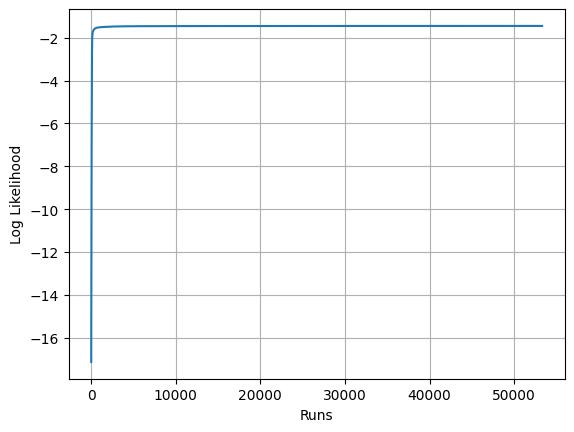

In [12]:
# set params
eta = .005 # learning rate
epsilon = 1e-5 # convergence criterion
num_iter = 1000 # number of MH steps

# generate random data set with 10-20 spins
n_spins = sal_data.shape[0]
w_init = np.ones((n_spins, n_spins))
w = w_init = w_init - np.diag(w_init)

theta = theta_init = np.random.randn(n_spins)

coupled_bm = BoltzmannMachine(sal_data, w, theta, eta, epsilon, num_iter)
coupled_bm.plot_LL('Salamander Coupled', 'exact', train_weights=True)

We notice that if we do not train the pairwise interactions / with weights the model only reaches a log likelihood of 1e-4/2. When training with pairwise interactions this converges to 1e-5

(5e-06, 0.2)

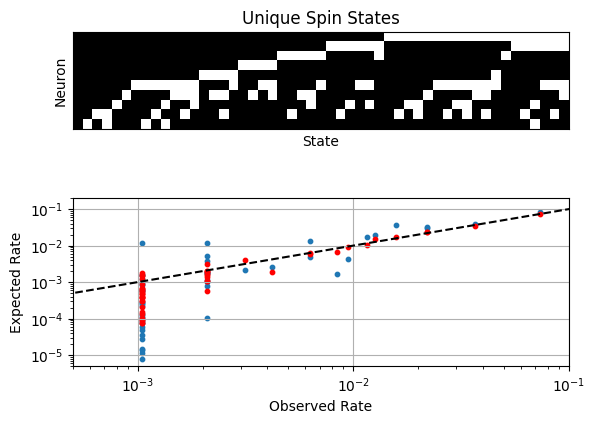

In [13]:
# Get unqie spin states
unique_states, counts = np.unique(sal_data, axis=1, return_counts=True) 
observed_rate = counts / sal_data.shape[1]
predicted_rate = bm.boltzmann_gibbs_normalized(unique_states)
coupled_predicted_rate = coupled_bm.boltzmann_gibbs_normalized(unique_states)
assert np.isclose(observed_rate.sum(), 1)
# Remove all -1 spins
observed_rate = observed_rate[1:]
predicted_rate = predicted_rate[1:]
coupled_predicted_rate = coupled_predicted_rate[1:] 


fig, axes = plt.subplots(2)
axes[0].imshow(unique_states, cmap='gray')
axes[0].set_title('Unique Spin States')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Neuron')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].scatter(observed_rate, predicted_rate, 
                s=10, label='Independent Spin Model')
axes[1].scatter(observed_rate, coupled_predicted_rate, 
                s=10, color='red', label='Coupled Spin Model')
# Labels
axes[1].set_xlabel('Observed Rate')
axes[1].set_ylabel('Expected Rate')
# Set log scaling
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].plot([1e-4, 1e-3, 1e-2, 10], [1e-4, 1e-3, 1e-2, 10], 
             color='black', linestyle='--', label='Equality')

# Aesthetic
axes[1].grid(True)
axes[1].set_xlim(1e-3/2, 1e-1)
axes[1].set_ylim(1e-5/2, 1e-1*2)